## **Applying K-Means Clustering**

## Step 1: Import the Required Libraries and Load the Dataset

- Import **pandas, NumPy, matplotlib, and KMeans** from sklearn
- Load the Mall_customers.csv dataset


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv('../../Datasets/Mall_customers.csv')

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


__Observation:__
- Here, we have the **Age, Gender, Income, and Spending Score** of the customers.

## Step 2: Prepare the Data

- Extract the relevant features from the dataset


In [9]:
# We extract Income and Spending score
X = df.iloc[:, [3, 4]].values
X #get our features

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [5]:
from sklearn.cluster import KMeans

## Elbow method 

- The elbow method involves plotting the number of clusters against the distortion or inertia to identify a significant flattening point known as the __elbow__ point.
- The elbow point represents a trade-off between capturing meaningful patterns and avoiding excessive complexity, and it indicates the optimal number of clusters.
- By choosing the value of k at the elbow point, we strike a balance between cluster quality and simplicity, resulting in a reasonable number of clusters.

## Step 3: Find the Optimal Number of Clusters Using the Elbow Method

- Calculate the WCSS (within-cluster sum of squares) for different numbers of clusters.
- Plot the WCSS values to find the optimal number of clusters.


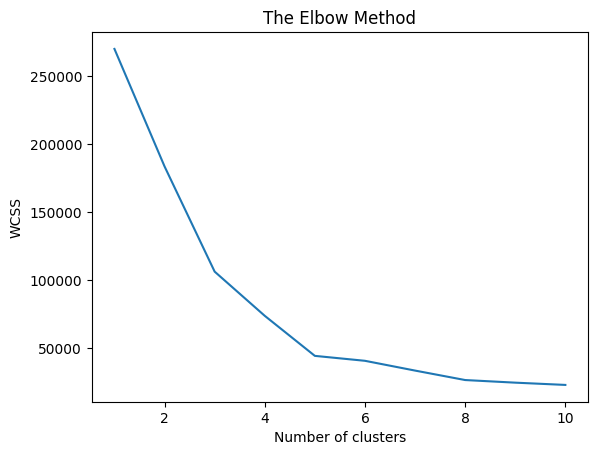

In [6]:
wcss = []

# Calculate the WCSS (within-cluster sum of squares) for different numbers of clusters.
for i in range(1, 11):
    model = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    model.fit(X)
    wcss.append(model.inertia_)


plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

__Observation:__

Seems like after 5 the change is not very big.

- K_means clusters with K = 5.



## Step 4: Train the K-Means Model on the Dataset

- Train the K-Means model with the optimal number of clusters


In [13]:
model = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = model.fit_predict(X)

labels = y_kmeans
labels

array([4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 0,
       4, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 1, 0, 1, 3, 1, 3, 1,
       0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1], dtype=int32)

## Step 5: Visualize the Clusters

- Plot the clusters and their centroids on a scatter plot
- Assign the color for each point
- Consider the title, xlabel, and ylabel

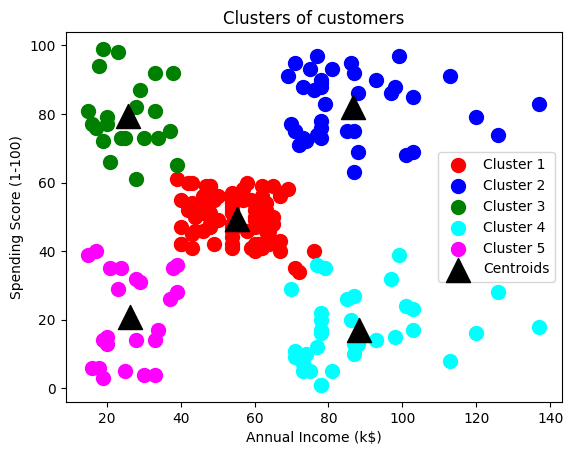

In [11]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')

plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1],  marker='^', s = 300, c = 'black', label = 'Centroids')

plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()